In [548]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [549]:
pd.options.mode.chained_assignment = None 

In [550]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'c019ba1c-b0b0-44c3-ad54-8f06cceb01c2'
resource_group = 'ml20220308'
workspace_name = 'labdp100'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='20220317londonSt')
dfOr=dataset.to_pandas_dataframe()

In [551]:
dfOr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24957 entries, 0 to 24956
Data columns (total 12 columns):
Crime ID                 20599 non-null object
Month                    24957 non-null object
Reported by              24957 non-null object
Falls within             24957 non-null object
Longitude                23434 non-null float64
Latitude                 23434 non-null float64
Location                 24957 non-null object
LSOA code                23469 non-null object
LSOA name                23469 non-null object
Crime type               24957 non-null object
Last outcome category    20599 non-null object
Context                  35 non-null object
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


In [552]:
for i in dfOr.columns:
   print(f"{i} : {dfOr[i].value_counts().count()}")

Crime ID : 20462
Month : 37
Reported by : 2
Falls within : 2
Longitude : 631
Latitude : 621
Location : 435
LSOA code : 103
LSOA name : 103
Crime type : 15
Last outcome category : 26
Context : 1


In [553]:
dfOr.select_dtypes(include='object').columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Location',
       'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category',
       'Context'],
      dtype='object')

In [554]:
for i in ['Reported by','Falls within','Crime type','Context']:
   print(f"{i} : {dfOr[i].unique()}")
   print() 

Reported by : ['City of London Police' 'Reported by']

Falls within : ['City of London Police' 'Falls within']

Crime type : ['Anti-social behaviour' 'Bicycle theft' 'Burglary'
 'Criminal damage and arson' 'Other theft' 'Shoplifting' 'Vehicle crime'
 'Public order' 'Theft from the person' 'Drugs'
 'Violence and sexual offences' 'Other crime' 'Possession of weapons'
 'Crime type' 'Robbery']

Context : [None 'Context']



# 1 .Clean Null Value

In [555]:
for i in ['Reported by','Falls within','Context']:
    dfOr.drop([i], axis=1, inplace= True)

In [556]:
dfOr = dfOr[~(dfOr['Month'] == 'Month')]

In [557]:
dfOr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24922 entries, 0 to 24956
Data columns (total 9 columns):
Crime ID                 20564 non-null object
Month                    24922 non-null object
Longitude                23434 non-null float64
Latitude                 23434 non-null float64
Location                 24922 non-null object
LSOA code                23434 non-null object
LSOA name                23434 non-null object
Crime type               24922 non-null object
Last outcome category    20564 non-null object
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


In [558]:
for i in ['Last outcome category']:
   print(f"{i} : {dfOr[i].unique()}")
   print() 

Last outcome category : [None 'Investigation complete; no suspect identified'
 'Court result unavailable' 'Offender given suspended prison sentence'
 'Unable to prosecute suspect' 'Status update unavailable'
 'Defendant found not guilty' 'Offender given a caution'
 'Offender sent to prison' 'Offender otherwise dealt with'
 'Offender fined' 'Offender given community sentence'
 'Further investigation is not in the public interest' 'Local resolution'
 'Court case unable to proceed' 'Offender given conditional discharge'
 'Formal action is not in the public interest'
 'Offender ordered to pay compensation'
 'Offender given a drugs possession warning'
 'Offender given penalty notice' 'Offender deprived of property'
 'Action to be taken by another organisation'
 'Suspect charged as part of another case' 'Defendant sent to Crown Court'
 'Awaiting court outcome' 'Under investigation']



In [559]:
#check relationship between Last outcome category and Crime type
df1 = dfOr[dfOr['Last outcome category'].isna()]
df1["Crime type"].unique()

array(['Anti-social behaviour'], dtype=object)

In [560]:
#Fill na 
dfOr.fillna(value={'Last outcome category':'Anti-social behaviour'},inplace = True)

In [561]:
dfOr.isna()

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
24952,False,False,True,True,False,True,True,False,False
24953,False,False,True,True,False,True,True,False,False
24954,False,False,True,True,False,True,True,False,False
24955,False,False,True,True,False,True,True,False,False


In [562]:
dfOr[dfOr["Longitude"].isna()]

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
594,29bb54ddd7b99248a234863b2e6d87353ec67e7286c016...,2016-10,NaN,NaN,No Location,None,None,Bicycle theft,Status update unavailable
595,40fe07d4fce1a889a2a9874271555258bd06e1d3155c09...,2016-10,NaN,NaN,No Location,None,None,Drugs,Status update unavailable
596,a52775be7b4bbd52adfd7c1c166bbc7b88b6f45f50aeef...,2016-10,NaN,NaN,No Location,None,None,Other theft,Status update unavailable
597,4c3a3db0337f36ac57589bf28d3fa26cec3ad648343ce5...,2016-10,NaN,NaN,No Location,None,None,Other theft,Status update unavailable
598,a7b34d98a50de3528930519e7d5003ccb95017a429e9f0...,2016-10,NaN,NaN,No Location,None,None,Shoplifting,Offender ordered to pay compensation
...,...,...,...,...,...,...,...,...,...
24952,2bb7e05ddccb1c7d6942c6d284e5ef6cc12eb19d63e8bc...,2019-09,NaN,NaN,No Location,None,None,Other crime,Under investigation
24953,0646a9c91a046d818ba93c72221184479bd2cddc0bff56...,2019-09,NaN,NaN,No Location,None,None,Other crime,Under investigation
24954,a5270ad22cf99ce32f3d5a7c4ab3e40e5c66f69d2ec5d0...,2019-09,NaN,NaN,No Location,None,None,Other crime,Under investigation
24955,7aef722945ed19c4517b33fb5f811d9ce5ff16b6637f81...,2019-09,NaN,NaN,No Location,None,None,Other crime,Under investigation


In [563]:
#Fill na 
dfOr.fillna(value={'Crime ID':'0'},inplace = True)

In [564]:
#Fill na 
dfOr.fillna(value={'LSOA code':'No value'},inplace = True)

In [565]:
#Fill na 
dfOr.fillna(value={'LSOA name':'No value'},inplace = True)

In [566]:
for i in ['Longitude','Latitude']:
    dfOr.dropna(subset=[i], inplace = True)

In [567]:
dfOr.reset_index()
dfOr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 24891
Data columns (total 9 columns):
Crime ID                 23434 non-null object
Month                    23434 non-null object
Longitude                23434 non-null float64
Latitude                 23434 non-null float64
Location                 23434 non-null object
LSOA code                23434 non-null object
LSOA name                23434 non-null object
Crime type               23434 non-null object
Last outcome category    23434 non-null object
dtypes: float64(2), object(7)
memory usage: 1.8+ MB


In [568]:
#dfOr.drop(["ID"], axis=1, inplace= True)

In [569]:
dfOr = dfOr.reset_index()
dfOr = dfOr.rename(columns={"index":"Idnew"})
dfOr['Idnew'] = dfOr.index + 1

In [570]:
dfOr.head()

,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,1,0,2016-10,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Anti-social behaviour,Anti-social behaviour
1,2,0,2016-10,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
2,3,0,2016-10,-0.097409,51.521145,On or near Goswell Road,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
3,4,0,2016-10,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
4,5,0,2016-10,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour


# 2. Set index column and keep original data

In [571]:
df = pd.DataFrame()
df = dfOr

In [572]:
df.head()

,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,1,0,2016-10,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Anti-social behaviour,Anti-social behaviour
1,2,0,2016-10,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
2,3,0,2016-10,-0.097409,51.521145,On or near Goswell Road,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
3,4,0,2016-10,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
4,5,0,2016-10,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour


In [573]:
#df.set_index("Idnew",inplace = True)

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23434 entries, 0 to 23433
Data columns (total 10 columns):
Idnew                    23434 non-null int64
Crime ID                 23434 non-null object
Month                    23434 non-null object
Longitude                23434 non-null float64
Latitude                 23434 non-null float64
Location                 23434 non-null object
LSOA code                23434 non-null object
LSOA name                23434 non-null object
Crime type               23434 non-null object
Last outcome category    23434 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 1.8+ MB


# 3. Transfrom object to integer

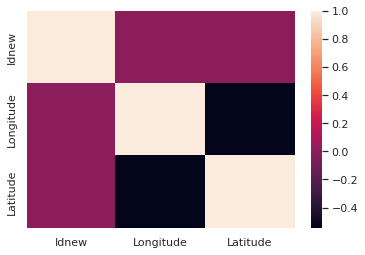

In [575]:
#This will show data that data type is interger , float (not string)
corr = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

In [576]:
df.select_dtypes(include='object').columns

Index(['Crime ID', 'Month', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [577]:
df.isna()

,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
23429,False,False,False,False,False,False,False,False,False,False
23430,False,False,False,False,False,False,False,False,False,False
23431,False,False,False,False,False,False,False,False,False,False
23432,False,False,False,False,False,False,False,False,False,False


In [578]:
from sklearn.preprocessing import LabelEncoder 

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col]= le.fit_transform(df[col])
    print(col)
df.head()

Crime ID
Month
Location
LSOA code
LSOA name
Crime type
Last outcome category


,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,1,0,0,-0.111497,51.518226,300,6,7,0,1
1,2,0,0,-0.097277,51.515307,360,0,10,0,1
2,3,0,0,-0.097409,51.521145,165,0,10,0,1
3,4,0,0,-0.097562,51.518864,299,0,10,0,1
4,5,0,0,-0.097277,51.515307,360,0,10,0,1


In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23434 entries, 0 to 23433
Data columns (total 10 columns):
Idnew                    23434 non-null int64
Crime ID                 23434 non-null int64
Month                    23434 non-null int64
Longitude                23434 non-null float64
Latitude                 23434 non-null float64
Location                 23434 non-null int64
LSOA code                23434 non-null int64
LSOA name                23434 non-null int64
Crime type               23434 non-null int64
Last outcome category    23434 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.8 MB


# 3. grouping latitude and latitude by Kmean

In [580]:
# Variable with the Longitude and Latitude
X=df.loc[:,['Idnew','Latitude','Longitude']]
X.head(10)

,Idnew,Latitude,Longitude
0,1,51.518226,-0.111497
1,2,51.515307,-0.097277
2,3,51.521145,-0.097409
3,4,51.518864,-0.097562
4,5,51.515307,-0.097277
5,6,51.520206,-0.097736
6,7,51.520348,-0.095914
7,8,51.520699,-0.097601
8,9,51.520699,-0.097601
9,10,51.517577,-0.098062


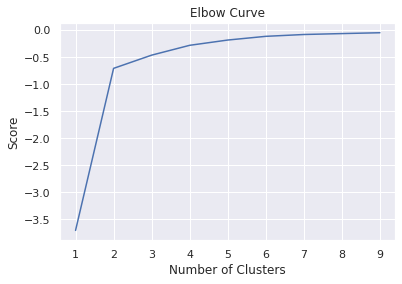

In [581]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [582]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Idnew,Latitude,Longitude,cluster_label
0,1,51.518226,-0.111497,1
1,2,51.515307,-0.097277,1
2,3,51.521145,-0.097409,1
3,4,51.518864,-0.097562,1
4,5,51.515307,-0.097277,1
5,6,51.520206,-0.097736,1
6,7,51.520348,-0.095914,1
7,8,51.520699,-0.097601,1
8,9,51.520699,-0.097601,1
9,10,51.517577,-0.098062,1


In [583]:
X['cluster_label'].value_counts()

0    14391
1     9042
2        1
Name: cluster_label, dtype: int64

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py3

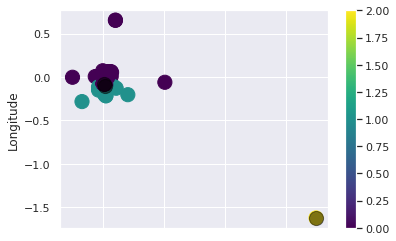

In [584]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=200, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [585]:
#cemteroid each cluster
centers = kmeans.cluster_centers_
print(centers)

[[51.5144311  -0.08217625]
 [51.51539164 -0.0998453 ]
 [53.245553   -1.621245  ]]


In [586]:
df.head()

,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,1,0,0,-0.111497,51.518226,300,6,7,0,1
1,2,0,0,-0.097277,51.515307,360,0,10,0,1
2,3,0,0,-0.097409,51.521145,165,0,10,0,1
3,4,0,0,-0.097562,51.518864,299,0,10,0,1
4,5,0,0,-0.097277,51.515307,360,0,10,0,1


In [587]:
X[['Idnew','cluster_label']]

,Idnew,cluster_label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
23429,23430,0
23430,23431,0
23431,23432,0
23432,23433,0


In [588]:
df = df.merge(X[['Idnew','cluster_label']],how="inner",on ="Idnew")

In [589]:
df

,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,cluster_label
0,1,0,0,-0.111497,51.518226,300,6,7,0,1,1
1,2,0,0,-0.097277,51.515307,360,0,10,0,1,1
2,3,0,0,-0.097409,51.521145,165,0,10,0,1,1
3,4,0,0,-0.097562,51.518864,299,0,10,0,1,1
4,5,0,0,-0.097277,51.515307,360,0,10,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
23429,23430,6703,35,-0.078779,51.508971,159,59,89,6,25,0
23430,23431,11697,35,-0.079130,51.507808,140,59,89,6,25,0
23431,23432,17513,35,-0.074901,51.506255,0,59,89,6,25,0
23432,23433,14573,35,-0.074901,51.506255,0,59,89,6,25,0


# 4 Nomarlize Latitude and Long

In [590]:
#normolize : x  >> Z-Score = (data-mean)/std (-3,3)
status = df.describe().T
status

,count,mean,std,min,25%,50%,75%,max
Idnew,23434.0,11717.500000,6764.957440,1.000000,5859.250000,11717.500000,17575.750000,23434.000000
Crime ID,23434.0,7778.211360,6193.443011,0.000000,1538.250000,7385.500000,13225.750000,19055.000000
Month,23434.0,18.588845,10.480500,0.000000,10.000000,19.000000,28.000000,35.000000
Longitude,23434.0,-0.089060,0.016064,-1.621245,-0.096363,-0.086624,-0.080782,0.652838
Latitude,23434.0,51.514876,0.012569,51.252939,51.512549,51.514463,51.517244,53.245553
Location,23434.0,216.404114,124.015108,0.000000,104.000000,238.000000,311.000000,432.000000
LSOA code,23434.0,74.520654,32.757782,0.000000,90.000000,90.000000,90.000000,101.000000
LSOA name,23434.0,16.402279,12.547199,0.000000,14.000000,14.000000,14.000000,101.000000
Crime type,23434.0,6.294231,4.503621,0.000000,2.000000,6.000000,10.000000,13.000000
Last outcome category,23434.0,11.554664,8.156093,0.000000,9.000000,9.000000,22.000000,25.000000


In [591]:
xmeanLong = status['mean'][3] 
xmeanLa = status['mean'][4] 
xmeanLong , xmeanLa


xstdLong = status['std'][3]
xstdLa = status['std'][4]
xstdLong,xstdLa

#z-score
df['Longitude'] = (df['Longitude'] - xmeanLong) /xstdLong   
df['Latitude'] = (df['Latitude'] - xmeanLa) /xstdLa   
df.head()

,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,cluster_label
0,1,0,0,-1.396795,0.266558,300,6,7,0,1,1
1,2,0,0,-0.511561,0.034322,360,0,10,0,1,1
2,3,0,0,-0.519778,0.498793,165,0,10,0,1,1
3,4,0,0,-0.529303,0.317317,299,0,10,0,1,1
4,5,0,0,-0.511561,0.034322,360,0,10,0,1,1


In [592]:
df['cluster_label'].value_counts()

0    14391
1     9042
2        1
Name: cluster_label, dtype: int64

In [593]:
df['Crime type'].value_counts()

6     5415
0     4314
13    3192
10    2470
11    1732
1     1228
4     1154
8      989
2      865
3      711
12     568
5      376
9      253
7      167
Name: Crime type, dtype: int64

<Figure size 432x288 with 0 Axes>

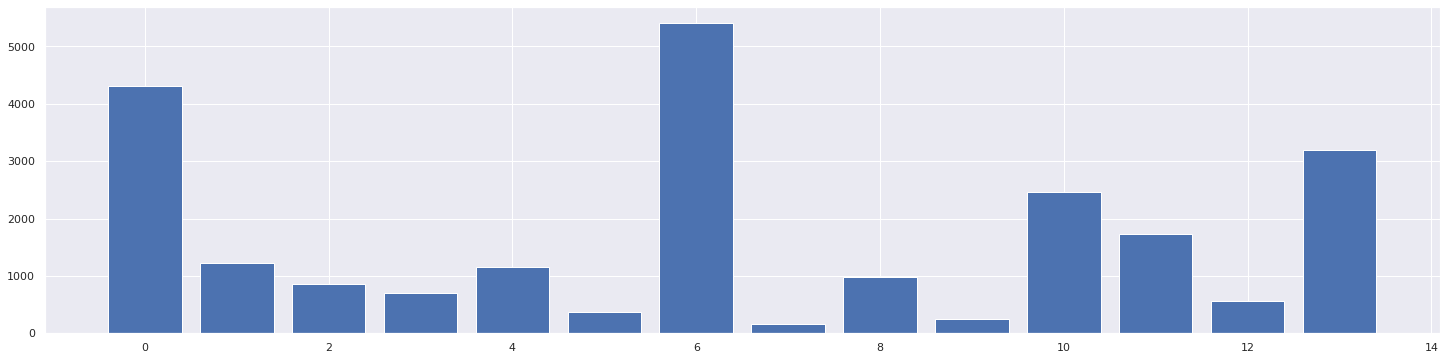

In [594]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(25,6))
m_and_b_counts = df['Crime type'].value_counts()
plt.bar(m_and_b_counts.index,m_and_b_counts )
#plt.rcParams['figure.figsize'] = [25, 15]
plt.show()

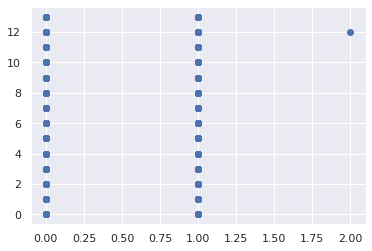

In [595]:
#importing library
import matplotlib.pyplot as plt
#datasets
Longitude = np.array(df['cluster_label'])
Latitude = np.array(df['Crime type'])
#x = zip(students_id, students_marks)
#print(tuple(x))
#scatter plot for the dataset
plt.scatter(Longitude, Latitude)
plt.show()

# 5 Catargorise crime type :: Often/ Sometimes / Sligthly

In [596]:
#df.set_index("Idnew",inplace = True)

In [597]:
df

,Idnew,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,cluster_label
0,1,0,0,-1.396795,0.266558,300,6,7,0,1,1
1,2,0,0,-0.511561,0.034322,360,0,10,0,1,1
2,3,0,0,-0.519778,0.498793,165,0,10,0,1,1
3,4,0,0,-0.529303,0.317317,299,0,10,0,1,1
4,5,0,0,-0.511561,0.034322,360,0,10,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
23429,23430,6703,35,0.639991,-0.469768,159,59,89,6,25,0
23430,23431,11697,35,0.618140,-0.562296,140,59,89,6,25,0
23431,23432,17513,35,0.881407,-0.685853,0,59,89,6,25,0
23432,23433,14573,35,0.881407,-0.685853,0,59,89,6,25,0


In [600]:
x = df.iloc[: ,2:10]                              #input
y = df.loc[:,["cluster_label"]]   

In [601]:
#separate data from training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

In [605]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model3 = algo
  model3.fit(xtrain, ytrain.values.ravel())
  predictions = model3.predict(xtest)
  print(accuracy_score(predictions, ytest))

0.9997866439086835
0.9997866439086835
0.9641561766588436
0.9991465756347344
0.8670791551098784
0.932366119052699


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [606]:
from sklearn.naive_bayes import GaussianNB
final_model = RandomForestClassifier()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9997866439086835


In [607]:
from joblib import dump
dump(final_model, 'filename.joblib') 

['filename.joblib']